# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [62]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [64]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [65]:
df_train.shape

(15223, 53)

In [66]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [67]:
df_test.shape

(14910, 52)

In [68]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [69]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [70]:
df = df_test.append(df_train).reset_index(drop=True)

In [71]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее', 'Высшее', 'Два и более высших образования', 'Неоконченное высшее', 'Неполное среднее', 'Среднее специальное'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Строительство', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Маркетинг', 'Сельское хозяйство', 'Недвижимость', 'Наука', 'Управляющая компания', 'Государственная служба', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Страхование', 'Энергетика', 'СМИ/Реклама/PR-агенства', 'Подбор персонала', 'Транспорт', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Нефтегазовая промышленность', 'Образование', 'Другие сферы', 'Сборочные производства', 'Салоны красоты и здоровья', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Логистика', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [36]:
df['WORK_TIME'].fillna(method='backfill', inplace=True)

In [37]:
df.isna().mean()

AGREEMENT_RK                  0.000000
TARGET                        0.000000
AGE                           0.000000
SOCSTATUS_WORK_FL             0.000000
SOCSTATUS_PENS_FL             0.000000
GENDER                        0.000000
CHILD_TOTAL                   0.000000
DEPENDANTS                    0.000000
EDUCATION                     0.000000
MARITAL_STATUS                0.000000
GEN_INDUSTRY                  0.090034
GEN_TITLE                     0.090034
ORG_TP_STATE                  0.090034
ORG_TP_FCAPITAL               0.089868
JOB_DIR                       0.090034
FAMILY_INCOME                 0.000000
PERSONAL_INCOME               0.000000
REG_ADDRESS_PROVINCE          0.000000
FACT_ADDRESS_PROVINCE         0.000000
POSTAL_ADDRESS_PROVINCE       0.000000
TP_PROVINCE                   0.019580
REGION_NM                     0.000066
REG_FACT_FL                   0.000000
FACT_POST_FL                  0.000000
REG_POST_FL                   0.000000
REG_FACT_POST_FL         

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [39]:
pd.get_dummies(df, columns=['EDUCATION', 'MARITAL_STATUS'])

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,...,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке
0,59909969,0,30,1,0,1,1,1,Образование,Специалист,...,0,0,0,1,0,0,0,1,0,0
1,59910420,0,48,0,1,1,0,0,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
2,59911223,0,35,1,0,0,1,0,Металлургия/Промышленность/Машиностроение,Специалист,...,0,0,1,0,0,0,0,1,0,0
3,59911322,0,22,1,0,0,0,0,Другие сферы,Специалист,...,0,0,1,0,0,0,0,1,0,0
4,59911438,0,27,1,0,1,2,2,Образование,Специалист,...,0,0,0,0,0,0,0,0,0,1
5,59911769,0,44,0,1,0,2,2,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
6,59912044,0,57,1,0,1,0,0,Сборочные производства,Специалист,...,0,0,1,0,0,0,0,1,0,0
7,59912382,0,33,1,0,1,2,2,Образование,Специалист,...,0,0,0,1,0,0,0,0,1,0
8,59912422,0,53,0,1,1,2,0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
9,59912485,1,33,1,0,0,1,0,Торговля,Рабочий,...,0,1,0,0,0,0,0,0,0,1


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [179]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK', 'PREVIOUS_CARD_NUM_UTILIZED', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'], axis=1)
    df_output['CREDIT'] = df_output['CREDIT'].str.replace(',','.').astype(float)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].str.replace(',','.').astype(float)
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].str.replace(',','.').astype(float)
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].str.replace(',','.').astype(float)
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].str.replace(',','.').astype(float)
    
    df_output = df_output[~df_output['WORK_TIME'].isnull() & ~df_output['GEN_INDUSTRY'].isnull()& ~df_output['GEN_TITLE'].isnull()& ~df_output['ORG_TP_STATE'].isnull() & ~df_output['ORG_TP_FCAPITAL'].isnull() & ~df_output['JOB_DIR'].isnull()]
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME'], drop_first=True)
    
    return df_output

In [180]:
preproc_data(df).head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,JOB_DIR_Пр-техн. обесп. и телеком.,JOB_DIR_Реклама и маркетинг,JOB_DIR_Служба безопасности,JOB_DIR_Снабжение и сбыт,JOB_DIR_Участие в основ. деятельности,JOB_DIR_Юридическая служба,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,0,0,1,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,1,0,0,1,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [181]:
df.describe

<bound method NDFrame.describe of        AGREEMENT_RK  TARGET  AGE  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0          59909969       0   30                  1                  0   
1          59910420       0   48                  0                  1   
2          59911223       0   35                  1                  0   
3          59911322       0   22                  1                  0   
4          59911438       0   27                  1                  0   
5          59911769       0   44                  0                  1   
6          59912044       0   57                  1                  0   
7          59912382       0   33                  1                  0   
8          59912422       0   53                  0                  1   
9          59912485       1   33                  1                  0   
10         59912527       0   33                  1                  0   
11         59912542       0   40                  1                  0   
12  

In [176]:
df['REGION_NM'].head()

0    ВОСТОЧНО-СИБИРСКИЙ
1         ЦЕНТРАЛЬНЫЙ 1
2         ЦЕНТРАЛЬНЫЙ 2
3    ВОСТОЧНО-СИБИРСКИЙ
4       ДАЛЬНЕВОСТОЧНЫЙ
Name: REGION_NM, dtype: object

In [183]:
preproc_data(df).dtypes

TARGET                                                   int64
AGE                                                      int64
SOCSTATUS_WORK_FL                                        int64
SOCSTATUS_PENS_FL                                        int64
GENDER                                                   int64
CHILD_TOTAL                                              int64
DEPENDANTS                                               int64
PERSONAL_INCOME                                        float64
REG_FACT_FL                                              int64
FACT_POST_FL                                             int64
REG_POST_FL                                              int64
REG_FACT_POST_FL                                         int64
REG_FACT_POST_TP_FL                                      int64
FL_PRESENCE_FL                                           int64
OWN_AUTO                                                 int64
AUTO_RUS_FL                                            

In [184]:
preproc_data(df).shape

(27416, 107)

In [185]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [193]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,JOB_DIR_Пр-техн. обесп. и телеком.,JOB_DIR_Реклама и маркетинг,JOB_DIR_Служба безопасности,JOB_DIR_Снабжение и сбыт,JOB_DIR_Участие в основ. деятельности,JOB_DIR_Юридическая служба,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
14910,0,49,1,0,1,2,1,5000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
14911,0,32,1,0,1,3,3,12000.0,1,1,...,0,0,0,0,1,0,1,0,0,0
14912,0,52,1,0,1,4,0,9000.0,1,1,...,0,0,0,0,1,0,1,0,0,0
14913,0,39,1,0,1,1,1,25000.0,0,1,...,0,0,0,0,1,0,0,1,0,0
14914,0,30,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,1,0,1,0,0,0


In [309]:
y = df_train_preproc['TARGET']

In [188]:
y_test = df_test_preproc['TARGET']

In [217]:
X = df_train_preproc.copy()

In [190]:
X_test = df_test_preproc.copy()

In [ ]:
X = X.drop(['TARGET'], axis=1)

In [310]:
df_good = df_train_preproc.copy().drop(['TARGET'], axis=1)

In [308]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [266]:
X.shape

(13855, 105)

In [228]:
df_preproc_importance.shape

(13855, 105)

In [267]:
rf_importance = pd.DataFrame(model.feature_importances_, X.iloc[:-1, :].columns)

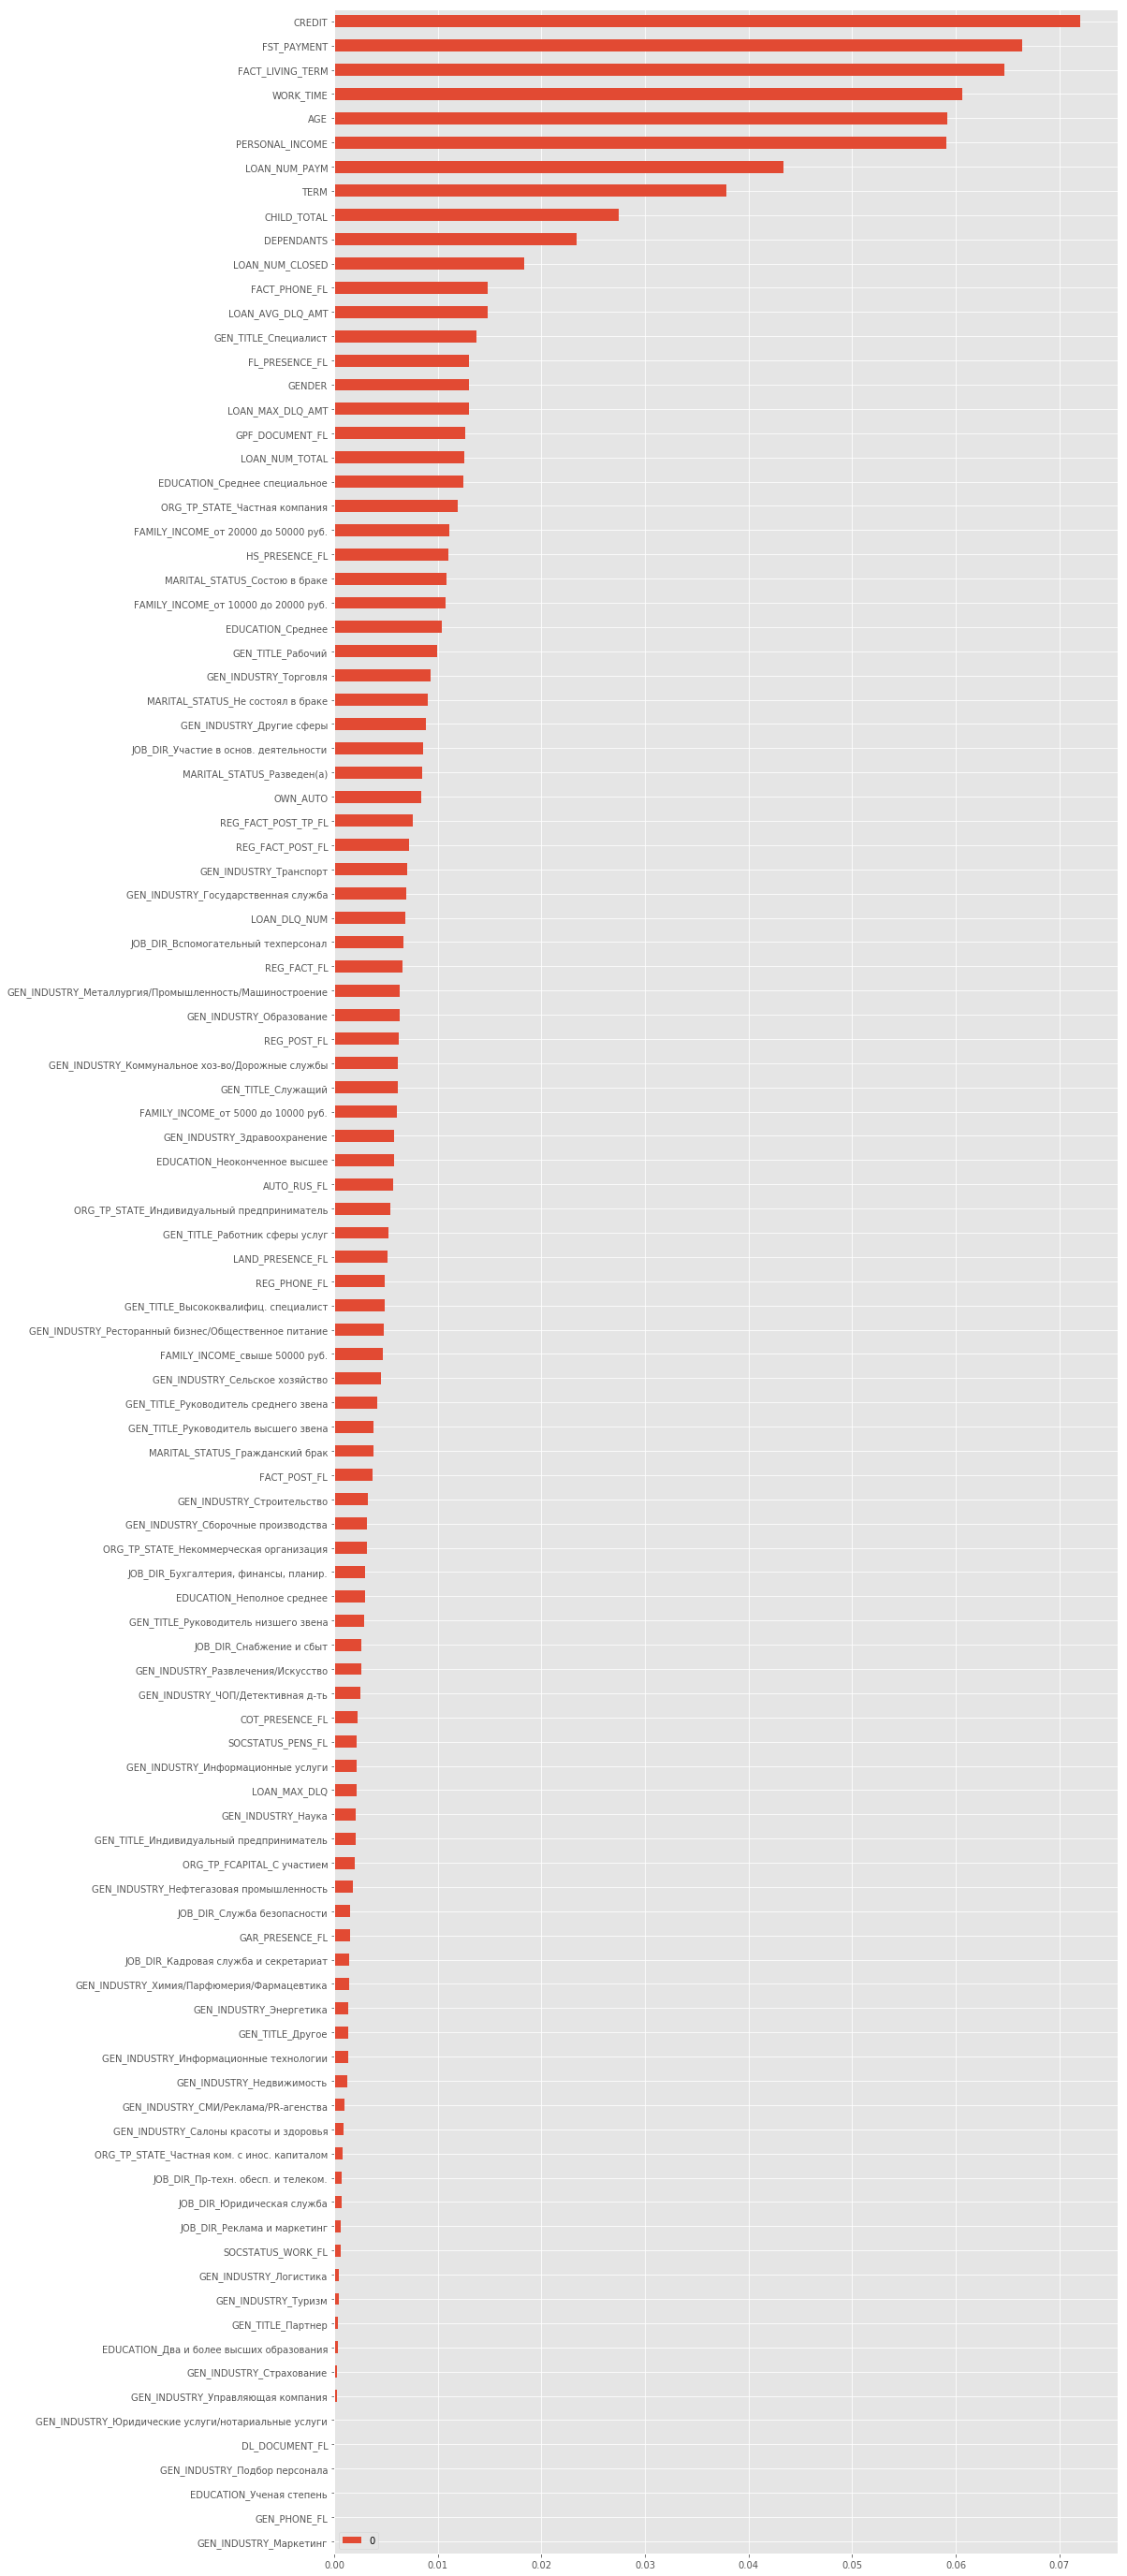

In [268]:
rf_importance.sort_values(by=0, ascending=True).plot.barh(figsize = (15, 50))

In [205]:
df_preproc_importance.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,JOB_DIR_Пр-техн. обесп. и телеком.,JOB_DIR_Реклама и маркетинг,JOB_DIR_Служба безопасности,JOB_DIR_Снабжение и сбыт,JOB_DIR_Участие в основ. деятельности,JOB_DIR_Юридическая служба,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
0,30,1,0,1,1,1,7000.0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,35,1,0,0,1,0,40000.0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
3,22,1,0,0,0,0,20000.0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
4,27,1,0,1,2,2,17000.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
6,57,1,0,1,0,0,10000.0,1,1,1,...,0,0,0,0,1,0,1,0,0,0


In [168]:
import missingno as msno

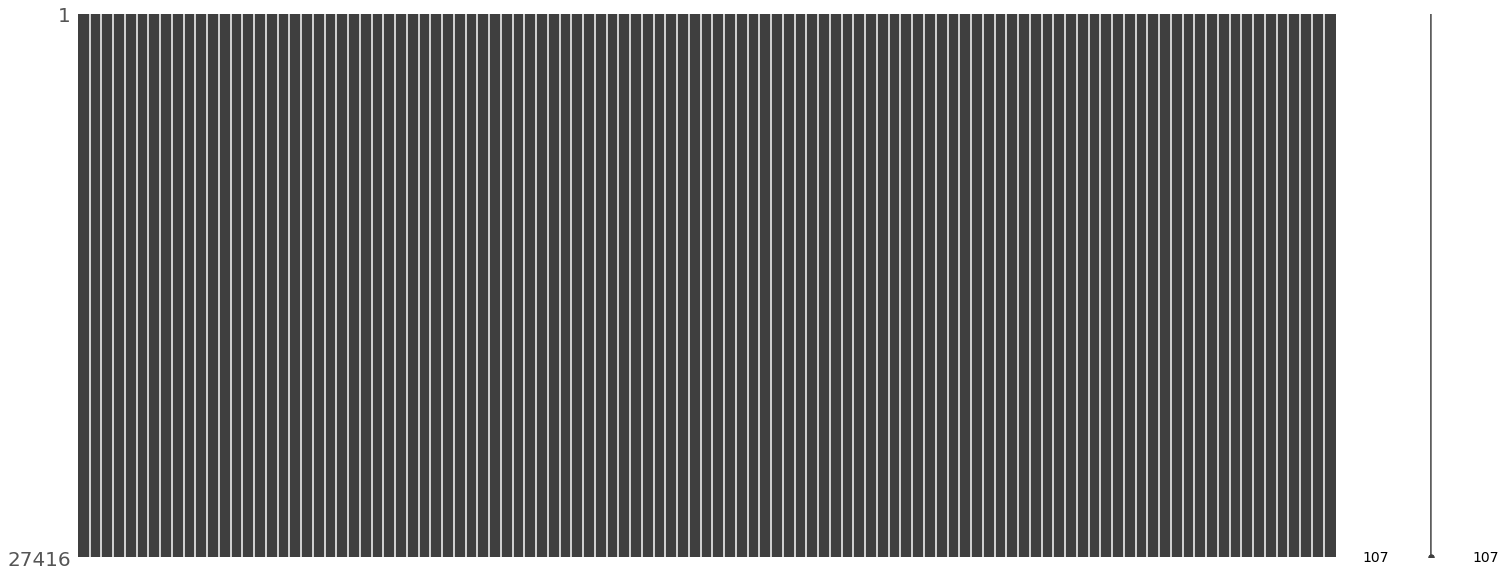

In [194]:
msno.matrix(df_preproc, sort='ascending')

#### Задание 5. Обучение и оценка качества разных моделей

In [311]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_good, y, test_size=0.3, random_state=42)
# test_size=0.3, random_state=42

## Your Code Here


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [312]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [349]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]

In [332]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [334]:
pd.Series(dtc.predict(X_test)).value_counts()

0    3519
1     638
dtype: int64

In [333]:
y_test.value_counts()

0    3637
1     520
Name: TARGET, dtype: int64

In [335]:
predict = dtc.predict(X_test) 

In [341]:
# Посчитать метрики стандартные
# accuracy, precision, recall
## Your Code Here

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
#print('f1', f1_score(y_test, predict))


precision 0.15047021943573669
recall 0.18461538461538463
accuracy 0.7676208804426269


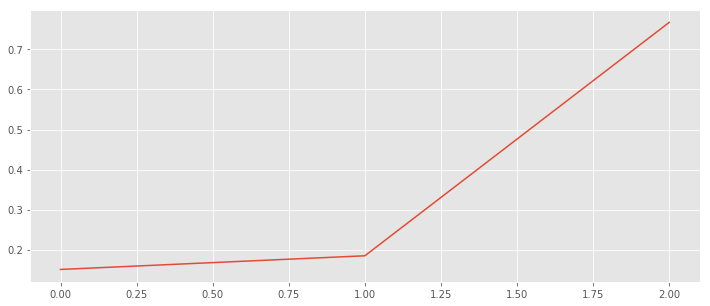

In [345]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
gr = [precision_score(y_test, predict), recall_score(y_test, predict), accuracy_score(y_test, predict)]
plt.plot(gr, )

(-0.01, 1.01)

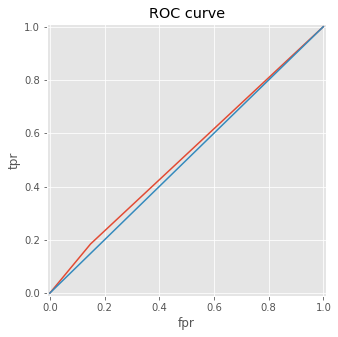

In [358]:
predict_proba = dtc.predict_proba(X_test) 

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

<Figure size 1440x1440 with 0 Axes>

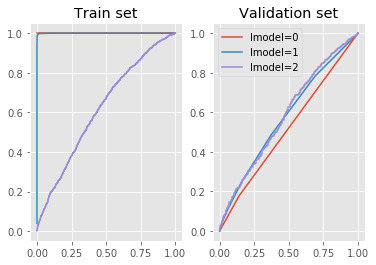

In [384]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
## Your Code Here

#scores_train = []
#scores_valid = []

#for y_pred in dtc.predict_proba(X_test):
    #scores_train.append(roc_auc_score(y_test, y_pred[:, 1]))
    
#for y_pred in dt.predict_proba(X):
    #scores_valid.append(roc_auc_score(y, y_pred[:, 1]))
    
#plt.plot(scores_train, label='train score')
#plt.plot(scores_valid, label='valid score')
#plt.legend()

plt.figure(figsize=(20, 20))     
fig, ax = plt.subplots(1,2)   
        
for i in [0,1,2]:
    models[i].fit(X_train, y_train)
    
    score_test=[]
    score_train=[]
    
    predict_proba = models[i].predict_proba(X_train)    
    
    fpr, tpr, thresholds = roc_curve(y_train, predict_proba[:,1])
    #score_train.insert(i,tpr)
    
    ax[0].plot(fpr, tpr, label='model={}'.format(i))
    ax[0].set_title('Train set')

    predict_proba = models[i].predict_proba(X_test)     
    
    fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
    #score_test.insert(i,tpr)
        
    ax[1].plot(fpr, tpr, label='lmodel={}'.format(i))
    ax[1].set_title('Validation set')
    
plt.legend()

In [388]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
## Your Code Here

scores = cross_val_score(models[2], X, y, scoring="roc_auc", cv=10, n_jobs=-1)
scores.mean(),scores.max()

(0.6132753085211018, 0.6607921648244228)

In [389]:
scores

array([0.62514825, 0.61364804, 0.62668107, 0.62942702, 0.62684694,
       0.54179356, 0.60570344, 0.66079216, 0.58954151, 0.6131711 ])

In [394]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
## Your Code Here

predict = models[2].predict_proba(X_test)
predict[:,1]


array([0.15768308, 0.20811083, 0.08494508, ..., 0.1531619 , 0.10402381,
       0.18336262])

(-0.01, 1.01)

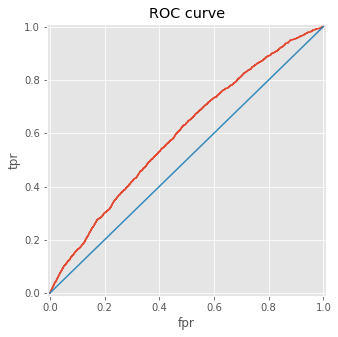

In [402]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

X_test_TEST = preproc_data(df_test).drop(['TARGET','sample'], axis=1)
Y_test_TEST = preproc_data(df_test)['TARGET']

fpr, tpr, thresholds = roc_curve(Y_test_TEST, predict[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [410]:
predict = models[2].predict_proba(X_test_TEST)
print(predict[:,1])
print(roc_auc_score(Y_test_TEST, predict[:,1]))

[0.17137441 0.18007056 0.26196156 ... 0.11886771 0.19999687 0.19021176]
0.5960476276221316


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)